In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 57.0 MB/s eta 0:00:00


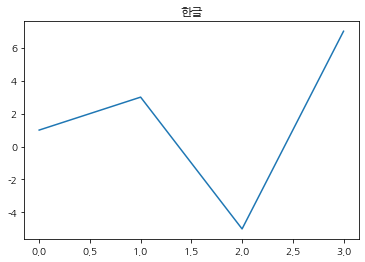

In [4]:
pd.Series([1,3,-5,7]).plot(title = "한글")

In [5]:
# !unzip open.zip

from google.colab import drive
drive.mount('gdrive')


with open('gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat 'gdrive/My Drive/foo.txt'

Mounted at gdrive
Hello Google Drive!

In [6]:
train = pd.read_csv("gdrive/My Drive/data/train_data.csv")
test = pd.read_csv("gdrive/My Drive/data/test_data.csv")

print(train.shape, test.shape)

display(train.head())
display(test.head())

(24998, 4) (1666, 4)


,index,premise,hypothesis,label
0,0,"씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서, 소년이나 장정들이...",씨름의 여자들의 놀이이다.,contradiction
1,1,"삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나,...",자작극을 벌인 이는 3명이다.,contradiction
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다.,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다.,entailment
3,3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다.,neutral
4,4,"진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면, 이런 상황에서는...",이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다.,neutral


,index,premise,hypothesis,label
0,0,다만 조금 좁아서 케리어를 펼치기 불편합니다.,케리어를 펼치기에 공간이 충분했습니다.,answer
1,1,그리고 위치가 시먼역보다는 샤오난먼역에 가까워요,시먼역보다는 샤오난먼역에 먼저 도착할 수 있어요,answer
2,2,구구절절 설명하고 이해시키려는 노력이 큰 의미없이 다가온다.,무엇인가 말을 많이 하기는 했지만 큰 의미가 있지는 않았다.,answer
3,3,몇 번을 다시봐도 볼 때마다 가슴이 저민다.,다시 봤을때는 무덤덤했다.,answer
4,4,"8월 중에 입주신청을 하면 청년은 9월, 신혼부부는 10월부터 입주가 가능하다.",8월 중에 입주신청을 하면 신혼부부는 9월 부터 입주가 가능하다.,answer


In [7]:
pd.read_csv("gdrive/My Drive/data/sample_submission.csv")

,index,label
0,0,answer
1,1,answer
2,2,answer
3,3,answer
4,4,answer
...,...,...
1661,1661,answer
1662,1662,answer
1663,1663,answer
1664,1664,answer


In [8]:
train.isnull().sum()

index         0
premise       0
hypothesis    0
label         0
dtype: int64

In [9]:
train.describe()

,index
count,24998.000000
mean,12498.500000
std,7216.445351
min,0.000000
25%,6249.250000
50%,12498.500000
75%,18747.750000
max,24997.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       24998 non-null  int64 
 1   premise     24998 non-null  object
 2   hypothesis  24998 non-null  object
 3   label       24998 non-null  object
dtypes: int64(1), object(3)
memory usage: 781.3+ KB


In [11]:
# !pip install transformers pororo kss wandb

In [12]:
#영문자 소문자로 변경하기
train["premise"].str.lower()
train["hypothesis"].str.lower()
test["premise"].str.lower()
test["hypothesis"].str.lower()
display(train)
display(test)

,index,premise,hypothesis,label
0,0,"씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서, 소년이나 장정들이...",씨름의 여자들의 놀이이다.,contradiction
1,1,"삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나,...",자작극을 벌인 이는 3명이다.,contradiction
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다.,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다.,entailment
3,3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다.,neutral
4,4,"진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면, 이런 상황에서는...",이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다.,neutral
...,...,...,...,...
24993,24993,"오페라에 비하여 오라토리오에서는 독창보다도 합창이 중시되며, 테스토 또는 이스토리쿠...",오라토리오에서 테스토의 역할이 가장 중요하다.,neutral
24994,24994,지하철역까지 걸어서 5분 정도 걸립니다.,지하철역까지 도보로 5분 정도 걸립니다.,entailment
24995,24995,한편 이날 중앙방역대책본부는 집단 감염이 발생한 음식점 관련 역학조사 결과를 공개했다.,중악방역대책본부는 집단 감염과 관련한 모든 정보를 비공개했다.,contradiction
24996,24996,마미손이 랩을 하자 시청자들은 그의 정체를 파악했다.,시청자들은 마미손의 정체를 안다.,entailment


,index,premise,hypothesis,label
0,0,다만 조금 좁아서 케리어를 펼치기 불편합니다.,케리어를 펼치기에 공간이 충분했습니다.,answer
1,1,그리고 위치가 시먼역보다는 샤오난먼역에 가까워요,시먼역보다는 샤오난먼역에 먼저 도착할 수 있어요,answer
2,2,구구절절 설명하고 이해시키려는 노력이 큰 의미없이 다가온다.,무엇인가 말을 많이 하기는 했지만 큰 의미가 있지는 않았다.,answer
3,3,몇 번을 다시봐도 볼 때마다 가슴이 저민다.,다시 봤을때는 무덤덤했다.,answer
4,4,"8월 중에 입주신청을 하면 청년은 9월, 신혼부부는 10월부터 입주가 가능하다.",8월 중에 입주신청을 하면 신혼부부는 9월 부터 입주가 가능하다.,answer
...,...,...,...,...
1661,1661,"또 작업자의 숙련도와 경험 향상, 전문성을 요구하는 난이도 높은 데이터 가공을 통해...",이미지 데이터를 가공하는 것이 가장 난이도가 높다.,answer
1662,1662,결말을 보니 아무래도 이 영화는 2부가 계획된 듯 합니다.,결말을 보니 분명히 2편이 나올것이 틀림없다.,answer
1663,1663,사회적 거리 두기 상황에서 총리도 카페를 갔다가 자리가 없어서 퇴짜 맞은 일도 있을...,사회적 거리두기 상황에서는 고위관직자도 방역지침을 준수해야 한다.,answer
1664,1664,로마에서 3박4일간 이곳에서 머물렀습니다.,이곳에서 머무르며 로마의 명소들을 방문했습니다.,answer


In [13]:
#공백 제거하기
train["premise"].str.strip()
train["hypothesis"].str.strip()
test["premise"].str.strip()
test["hypothesis"].str.strip()
display(train)
display(test)

,index,premise,hypothesis,label
0,0,"씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서, 소년이나 장정들이...",씨름의 여자들의 놀이이다.,contradiction
1,1,"삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나,...",자작극을 벌인 이는 3명이다.,contradiction
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다.,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다.,entailment
3,3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다.,neutral
4,4,"진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면, 이런 상황에서는...",이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다.,neutral
...,...,...,...,...
24993,24993,"오페라에 비하여 오라토리오에서는 독창보다도 합창이 중시되며, 테스토 또는 이스토리쿠...",오라토리오에서 테스토의 역할이 가장 중요하다.,neutral
24994,24994,지하철역까지 걸어서 5분 정도 걸립니다.,지하철역까지 도보로 5분 정도 걸립니다.,entailment
24995,24995,한편 이날 중앙방역대책본부는 집단 감염이 발생한 음식점 관련 역학조사 결과를 공개했다.,중악방역대책본부는 집단 감염과 관련한 모든 정보를 비공개했다.,contradiction
24996,24996,마미손이 랩을 하자 시청자들은 그의 정체를 파악했다.,시청자들은 마미손의 정체를 안다.,entailment


,index,premise,hypothesis,label
0,0,다만 조금 좁아서 케리어를 펼치기 불편합니다.,케리어를 펼치기에 공간이 충분했습니다.,answer
1,1,그리고 위치가 시먼역보다는 샤오난먼역에 가까워요,시먼역보다는 샤오난먼역에 먼저 도착할 수 있어요,answer
2,2,구구절절 설명하고 이해시키려는 노력이 큰 의미없이 다가온다.,무엇인가 말을 많이 하기는 했지만 큰 의미가 있지는 않았다.,answer
3,3,몇 번을 다시봐도 볼 때마다 가슴이 저민다.,다시 봤을때는 무덤덤했다.,answer
4,4,"8월 중에 입주신청을 하면 청년은 9월, 신혼부부는 10월부터 입주가 가능하다.",8월 중에 입주신청을 하면 신혼부부는 9월 부터 입주가 가능하다.,answer
...,...,...,...,...
1661,1661,"또 작업자의 숙련도와 경험 향상, 전문성을 요구하는 난이도 높은 데이터 가공을 통해...",이미지 데이터를 가공하는 것이 가장 난이도가 높다.,answer
1662,1662,결말을 보니 아무래도 이 영화는 2부가 계획된 듯 합니다.,결말을 보니 분명히 2편이 나올것이 틀림없다.,answer
1663,1663,사회적 거리 두기 상황에서 총리도 카페를 갔다가 자리가 없어서 퇴짜 맞은 일도 있을...,사회적 거리두기 상황에서는 고위관직자도 방역지침을 준수해야 한다.,answer
1664,1664,로마에서 3박4일간 이곳에서 머물렀습니다.,이곳에서 머무르며 로마의 명소들을 방문했습니다.,answer


In [14]:
# !pip install konlpy --upgrade

In [15]:
train["label"].value_counts()

entailment       8561
contradiction    8489
neutral          7948
Name: label, dtype: int64

In [16]:
df = train[train["label"].isin(["entailment","contradiction","neutral"])]
df.shape

(24998, 4)

In [17]:
train["logic"] = train["premise"] + train["hypothesis"]
train.head(3)

,index,premise,hypothesis,label,logic
0,0,"씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서, 소년이나 장정들이...",씨름의 여자들의 놀이이다.,contradiction,"씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서, 소년이나 장정들이..."
1,1,"삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나,...",자작극을 벌인 이는 3명이다.,contradiction,"삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나,..."
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다.,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다.,entailment,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다.예측적 범죄예방 시스템 구축...


In [18]:
label_name = "label"

In [19]:
X = train["logic"]
y = train[label_name]
X.shape, y.shape

((24998,), (24998,))

In [20]:
y_onehot = pd.get_dummies(y)
y_onehot.head(3)

,contradiction,entailment,neutral
0,1,0,0
1,1,0,0
2,0,1,0


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y_onehot)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((19998,), (5000,), (19998, 3), (5000, 3))

In [22]:
display(y_train.value_counts(normalize= True))
display(y_val.value_counts(normalize = True))

contradiction  entailment  neutral
0              1           0          0.342484
1              0           0          0.339584
0              0           1          0.317932
dtype: float64

contradiction  entailment  neutral
0              1           0          0.3424
1              0           0          0.3396
0              0           1          0.3180
dtype: float64

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [24]:
vocab_size = 1000
oov_tok = "UNK"
tokenizer = Tokenizer(num_words = vocab_size, oov_token= oov_tok)
tokenizer

In [25]:
tokenizer.fit_on_texts(X_train)

In [26]:
pd.DataFrame(tokenizer.word_counts.items()).sort_values(1, ascending=False).set_index(0).T

,있다,수,있는,이,위해,등,영화,대한,있습니다,한,...,자유게시판에,찾기가,신축하는,묵주와,기탁한,지겨웠던,진짜같아서,생산월과,게시되어있다,볼만했다복수를
1,2886,2310,1228,1228,960,959,864,836,829,703,...,1,1,1,1,1,1,1,1,1,1


In [27]:
train_sequence = tokenizer.texts_to_sequences(X_train)
test_sequence = tokenizer.texts_to_sequences(X_val)

In [28]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 500
padding_type = 'post'

X_train_sp = pad_sequences(train_sequence,maxlen=max_length,padding=padding_type)
X_test_sp = pad_sequences(test_sequence, maxlen= max_length, padding = padding_type)

X_train_sp.shape ,X_test_sp.shape

((19998, 500), (5000, 500))

In [29]:
display(X_train_sp[0,:100])
display(X_test_sp[0, :100])

array([  1, 956,   1,   1,  29,   1,   1,   1,   1,   1, 681,  10,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

array([  1,   1,  51, 167,   1,   1, 948,   1, 208,   1,   1,   1,  51,
       167,   1,   1, 948,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, GRU, Bidirectional, LSTM, Dropout, BatchNormalization

In [31]:
embedding_dim = 64

In [32]:
n_class = y_train.shape[1]
n_class

3

In [33]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, 
                    output_dim=embedding_dim, 
                    input_length=max_length))
model.add(Bidirectional(SimpleRNN(units=64, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(units=64, return_sequences=True)))
model.add(SimpleRNN(units=64))
model.add(Dense(n_class, activation="softmax"))

In [34]:
model.compile(optimizer='adam', loss = "categorical_crossentropy",metrics=["accuracy"])

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [36]:
X_train_sp.shape, y_train.shape

((19998, 500), (19998, 3))

In [37]:
history = model.fit(X_train_sp, y_train, validation_split=0.2,epochs =100, callbacks = [early_stop])

Epoch 1/100
500/500 [==============================] - 1086s 2s/step - loss: 1.1119 - accuracy: 0.3404 - val_loss: 1.0985 - val_accuracy: 0.3385
Epoch 2/100
500/500 [==============================] - 1064s 2s/step - loss: 1.1021 - accuracy: 0.3394 - val_loss: 1.0977 - val_accuracy: 0.3385
Epoch 3/100
500/500 [==============================] - 1061s 2s/step - loss: 1.1017 - accuracy: 0.3349 - val_loss: 1.0991 - val_accuracy: 0.3092
Epoch 4/100
500/500 [==============================] - 1053s 2s/step - loss: 1.1024 - accuracy: 0.3353 - val_loss: 1.1042 - val_accuracy: 0.3385
Epoch 5/100
500/500 [==============================] - 1050s 2s/step - loss: 1.1023 - accuracy: 0.3362 - val_loss: 1.1073 - val_accuracy: 0.3385
Epoch 6/100
500/500 [==============================] - 1055s 2s/step - loss: 1.1023 - accuracy: 0.3352 - val_loss: 1.1016 - val_accuracy: 0.3385
Epoch 7/100
500/500 [==============================] - 1076s 2s/step - loss: 1.1017 - accuracy: 0.3289 - val_loss: 1.0996 - val_ac

In [38]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,accuracy,val_loss,val_accuracy
2,1.101724,0.334917,1.099111,0.30925
3,1.102428,0.335292,1.104183,0.33850
4,1.102297,0.336167,1.107281,0.33850
5,1.102255,0.335167,1.101567,0.33850
6,1.101698,0.328854,1.099649,0.30925


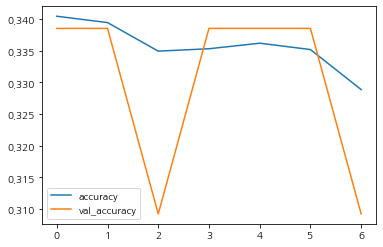

In [39]:
df_hist[["accuracy","val_accuracy"]].plot()